## 1.Read the data as an appropriate Time Series data and plot the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
rose = pd.read_csv("Rose.csv")

In [3]:
rose.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [6]:
rose['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
rose.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [7]:
rose['Time_Stamp'] = pd.to_datetime(rose['Time_Stamp'])

In [8]:
rosedf= rose.set_index('Time_Stamp')
rosedf.drop(['YearMonth'], axis=1, inplace=True)
rosedf.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


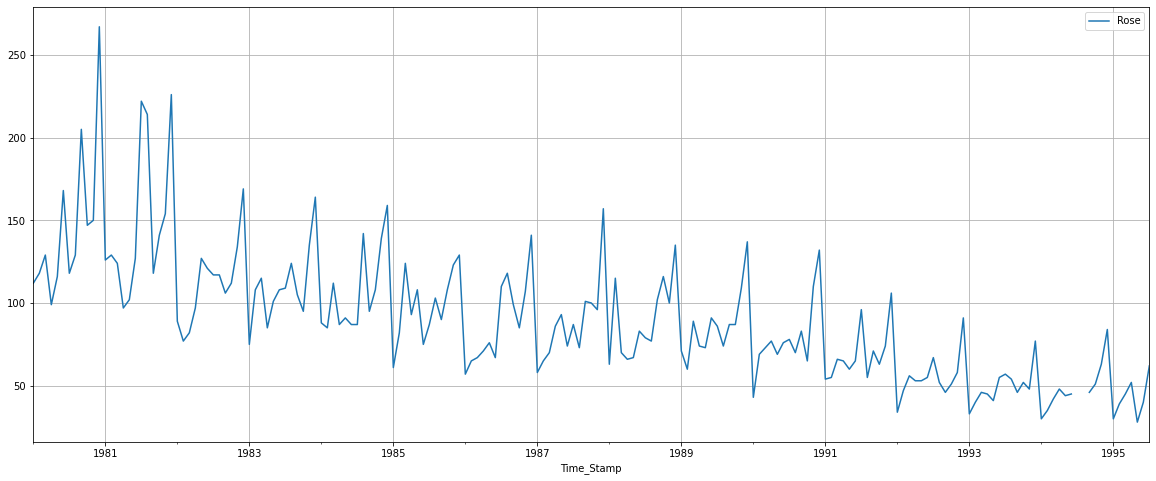

In [9]:
rosedf.plot(figsize=(20,8))
plt.grid()

We can see that there is a decreasing trend.

# 2.  Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [10]:
print("The number of rows: ",rosedf.shape[0])
print("The number of rows: ",rosedf.shape[0])

The number of rows:  187
The number of rows:  187


In [11]:
rosedf.isna().sum()

Rose    2
dtype: int64

It is evident that there are 2 missing values.

In [12]:
rosedf.Rose[174]
rosedf.Rose[175]

nan

In [13]:
#imputing missing values using interpolate(method="linear")
rosedf['Rose'].interpolate(method='linear', inplace=True)

In [14]:
#rosedf.Rose[174]
rosedf.Rose[175]

45.666666666666664

In [15]:
rosedf.isnull().sum()

Rose    0
dtype: int64

2 missing values are treated using interpolate method, hence there are no missing values.

In [16]:
rosedf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


## Check the basic measures of descriptive statistics of the Time Series

In [17]:
round(rosedf.describe(),3)

,Rose
count,187.000
mean,89.914
std,39.238
min,28.000
25%,62.500
50%,85.000
75%,111.000
max,267.000


Time series not is stationary because it does not have a well-defined mean or variance

Plot a boxplot to understand the spread of sales across different years and within different months across years.

Yearly Boxplot-trend

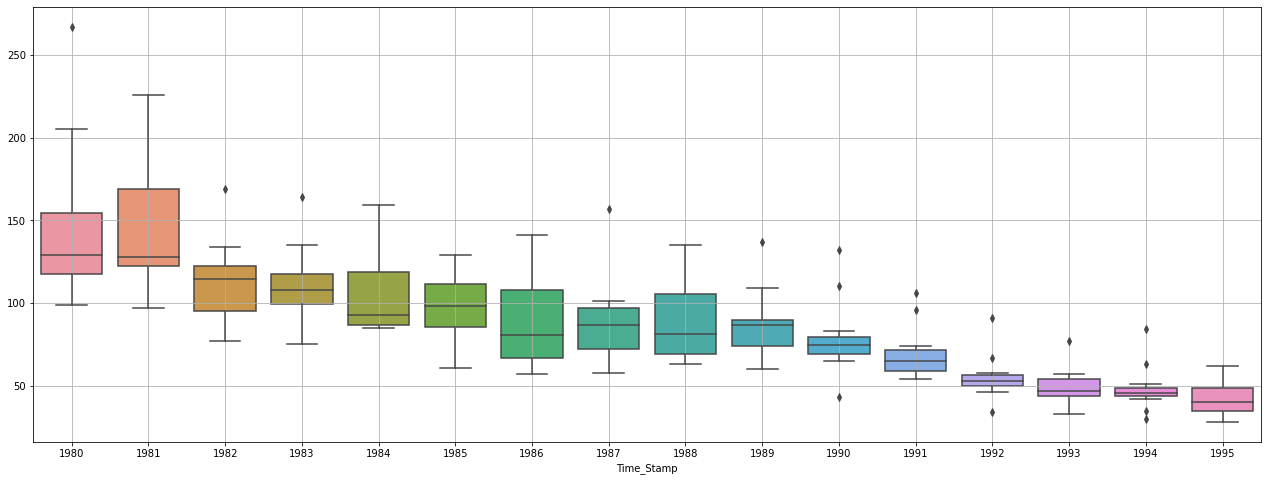

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rosedf.index.year,y = rosedf.values[:,0],ax=ax)
plt.grid();

Monthly Boxplot-seasonality

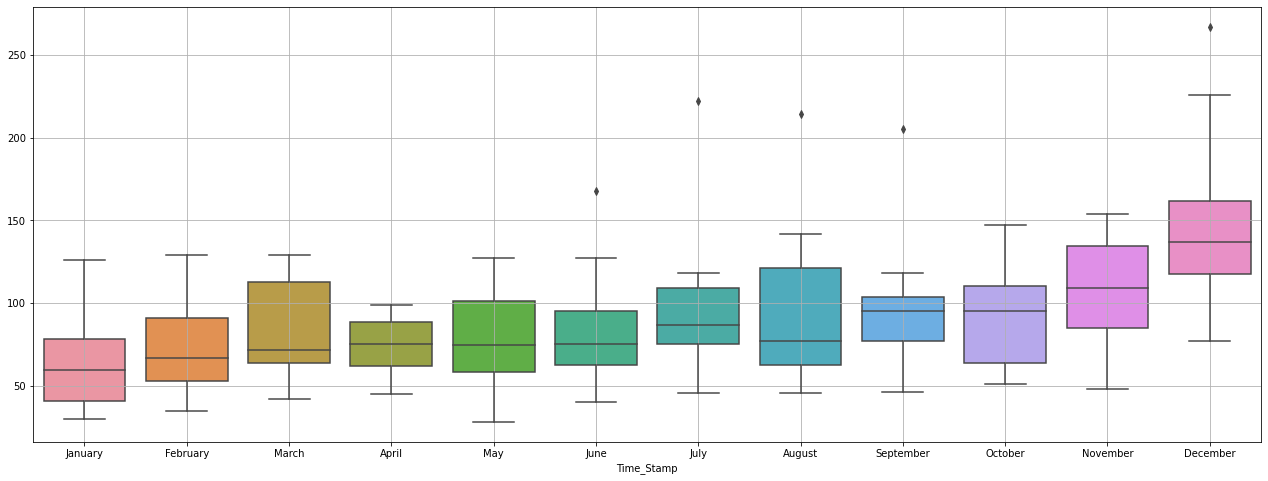

In [19]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rosedf.index.month_name(),y = rosedf.values[:,0],ax=ax)
plt.grid();

We see that there is maximum Rose wine sales in the month of December, which can be attributed to the holiday discounts season.

Plot a graph of monthly sales across years.

In [20]:
monthly_sales_across_years = pd.pivot_table(rosedf, values = 'Rose', columns = rosedf.index.month_name(), index = rosedf.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


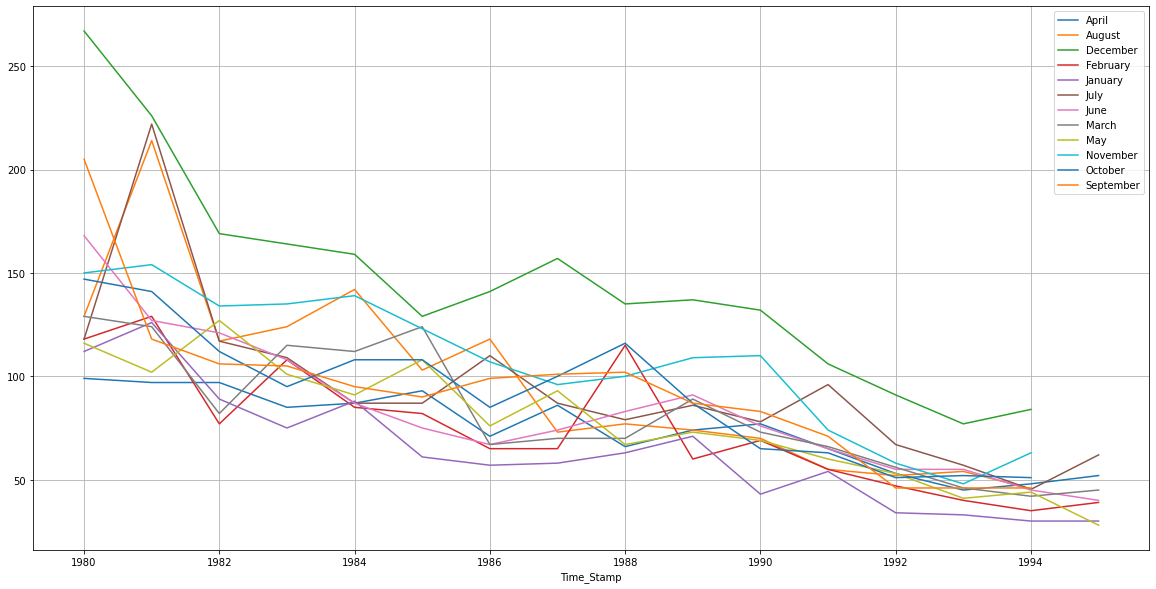

In [21]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

#From the graph also, we can conclude that December has the highest sales across years.

Plot a monthplot of the give Time Series.

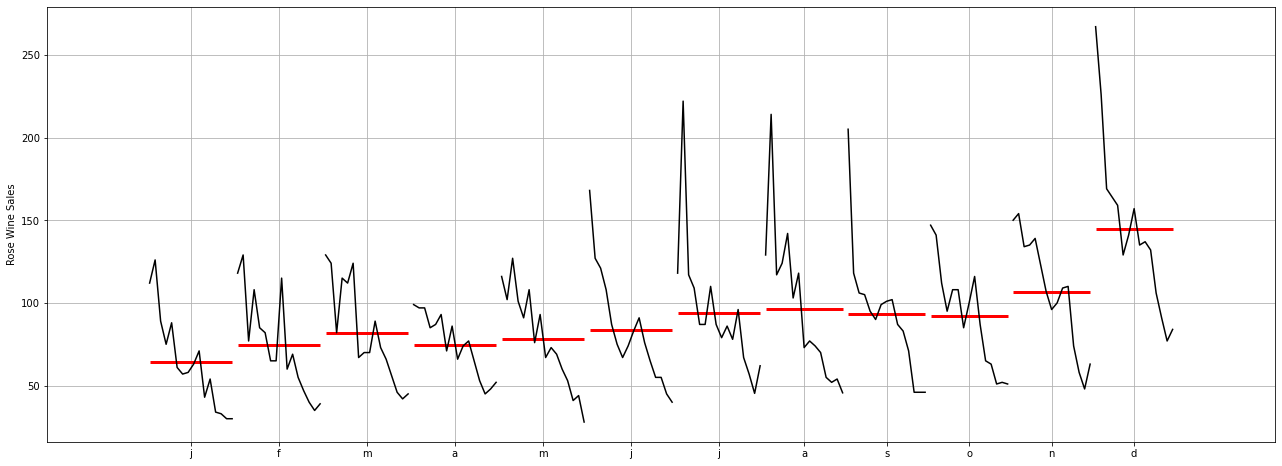

In [22]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(rosedf,ylabel='Rose Wine Sales',ax=ax)
plt.grid();

Decomposition

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

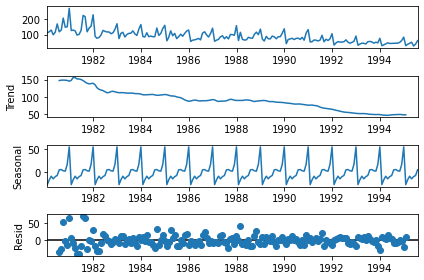

In [24]:
decomposition_add = seasonal_decompose(rosedf,model='additive')
decomposition_add.plot();

In [25]:
trend = decomposition_add.trend
seasonality = decomposition_add.seasonal
residual = decomposition_add.resid
observed=decomposition_add.observed

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')
print('Observed','\n',observed.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

The series is additive

# 3. Split the data into training and test. The test data should start in 1991.

In [26]:
train_rose=rosedf[rosedf.index.year < 1991]
test_rose=rosedf[rosedf.index.year >= 1991]

In [27]:
print(train_rose.shape)
print(test_rose.shape)

(132, 1)
(55, 1)


In [28]:
from IPython.display import display

In [29]:
print('First few rows of Training Data')
display(train_rose.head())
print('Last few rows of Training Data')
display(train_rose.tail())
print('First few rows of Test Data')
display(test_rose.head())
print('Last few rows of Test Data')
display(test_rose.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


4.Build various exponential smoothing models on the training data and evaluate the model
using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc

Building different models and comparing the accuracy metrics.

Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sparkling' variable against 
the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [30]:
train_time_rose = [i+1 for i in range(len(train_rose))]
test_time_rose= [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time_rose)
print('Test Time instance','\n',test_time_rose)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set.
Now we will add these values in the training and test set.

In [31]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [32]:
LinearRegression_train_rose['time'] = train_time_rose
LinearRegression_test_rose['time'] = test_time_rose

print('First few rows of Training Data','\n',LinearRegression_train_rose.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_rose.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_rose.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_rose.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛
to build the model on the training data and test the model on the test data.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'].values)

LinearRegression()

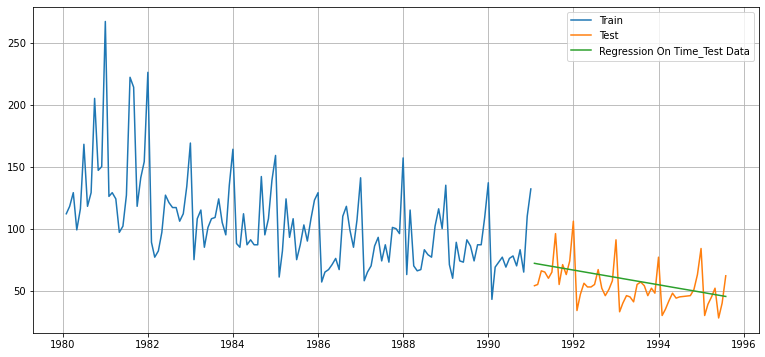

In [36]:
test_predictions_model1  = lr.predict(LinearRegression_test_rose[['time']])
LinearRegression_test_rose['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Defining the accuracy metrics.

In [37]:
from sklearn import metrics

In [38]:
## Test Data - RMSE - Sparkling

rmse_model1_test1 = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test1))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [39]:
resultsDf= pd.DataFrame({'Test RMSE': [rmse_model1_test1]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,15.268955


Model 2: Naive Approach:

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction 
for day after tomorrow is tomorrow and since the prediction of tomorrow 
is same as today,therefore the prediction for day after tomorrow is also today.

In [40]:
NaiveModel_train_rose = train_rose.copy()
NaiveModel_test_rose = test_rose.copy()

In [41]:
NaiveModel_test_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test_rose['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

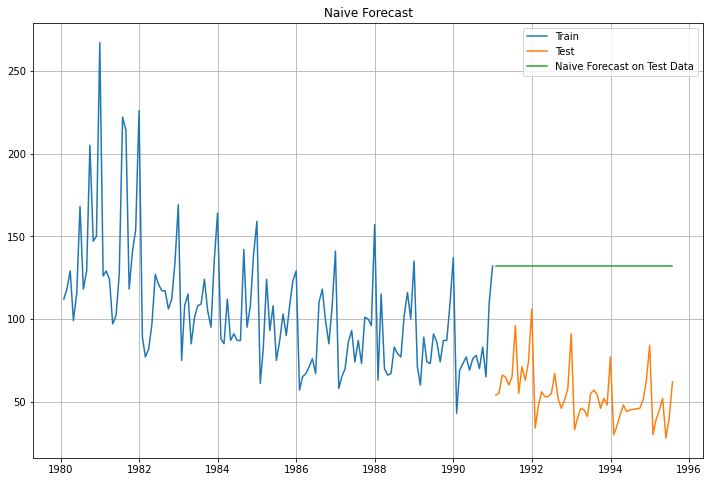

In [42]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [43]:
## Test Data - RMSE - Sparkling

rmse_model2_test1 = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test_rose['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data-Rose,  RMSE is %3.3f" %(rmse_model2_test1))

For RegressionOnTime forecast on the Test Data-Rose,  RMSE is 79.719


In [44]:
resultsDf1 = pd.DataFrame({'Test RMSE': [rmse_model2_test1]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf1])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773


Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [45]:
SimpleAverage_train = train_rose.copy()
SimpleAverage_test = test_rose.copy()

In [46]:
SimpleAverage_test['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


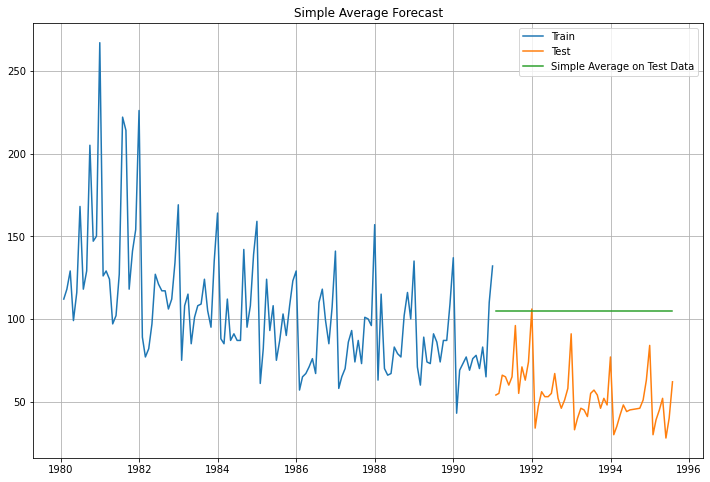

In [47]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [48]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [49]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


# Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals.
The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [50]:
MovingAverage = rosedf.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [51]:
#### Trailing moving averages

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


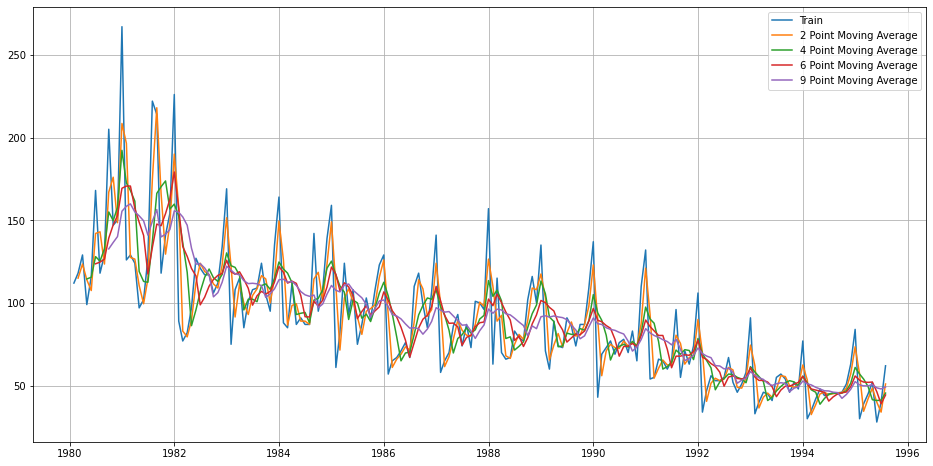

In [52]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();


Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be 
carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [53]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

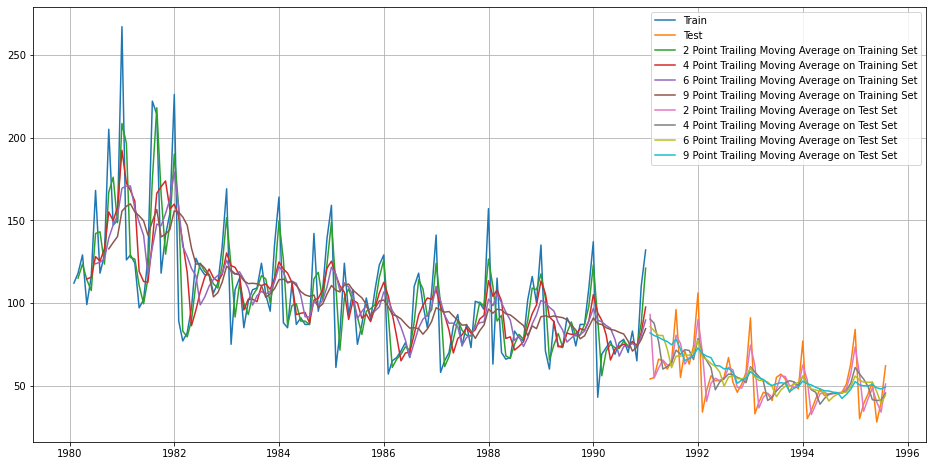

In [54]:

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [55]:
### Model Evaluation

##### Done only on the test data.

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [56]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


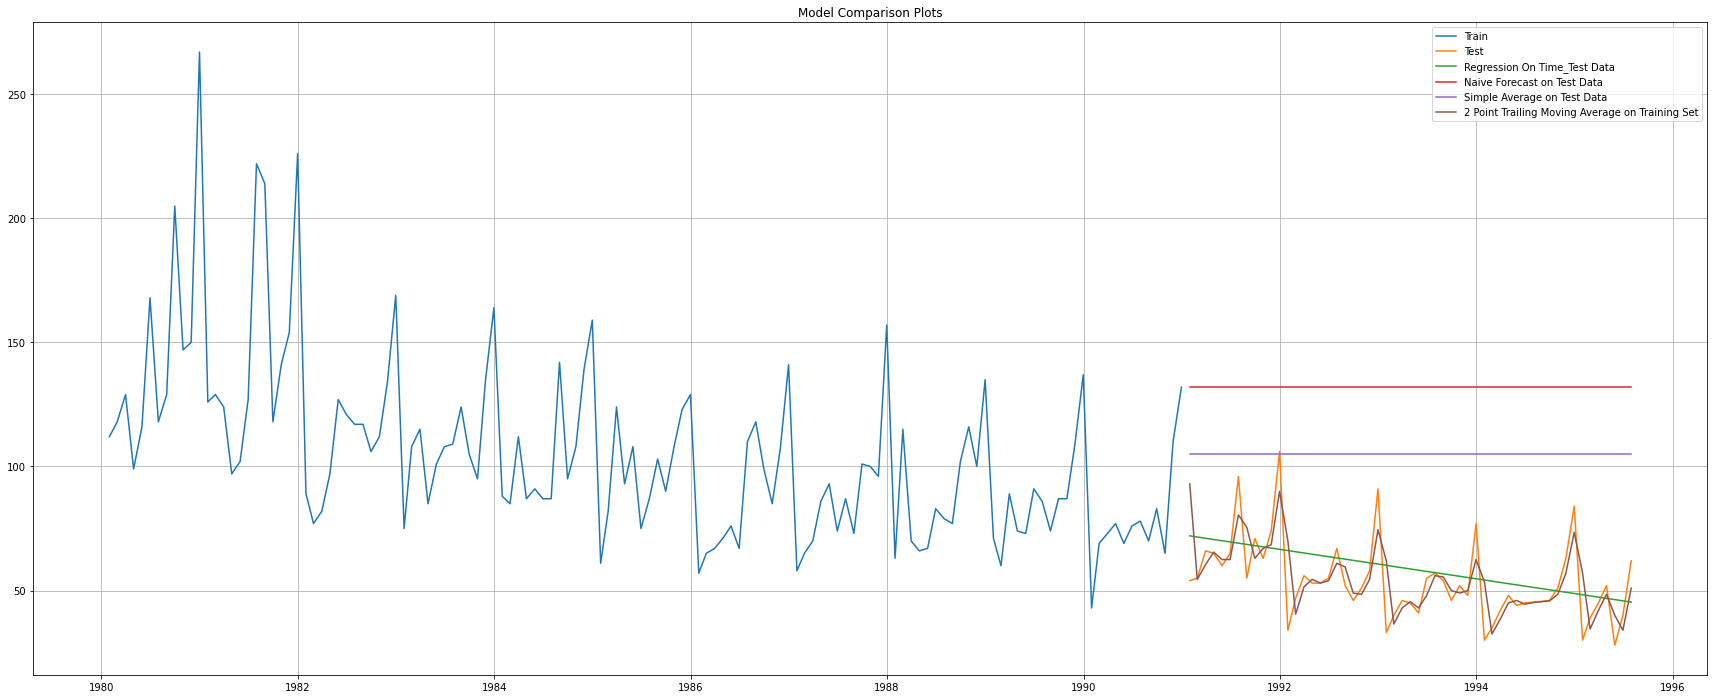

In [57]:
## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [58]:
## Method 5: Simple Exponential Smoothing

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [60]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()

In [61]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [62]:
model_SES_autofit = model_SES.fit(optimized=True)

In [63]:
model_SES_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_rose))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104999
1991-02-28,55.0,87.104999
1991-03-31,66.0,87.104999
1991-04-30,65.0,87.104999
1991-05-31,60.0,87.104999


In [65]:
### Model Evaluation for $\alpha$ = 0.098: Simple Exponential Smoothing
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


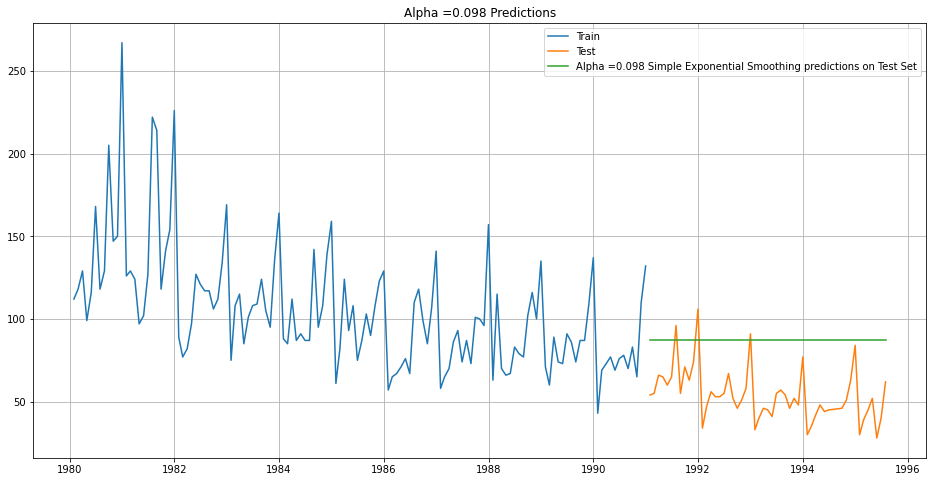

In [66]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

In [67]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242


# Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [68]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [69]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test_rose))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [70]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
6,0.07,36.435772
7,0.08,36.462965
5,0.06,36.580469
8,0.09,36.604118
9,0.10,36.828033
...,...,...
94,0.95,78.532696
95,0.96,78.786884
96,0.97,79.032686
97,0.98,79.270003


In [71]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.07,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772


In [72]:
# setting alpha value based on recent observation.(alpha > 0.5)

In [73]:
model_SES1 = SimpleExpSmoothing(SES_train['Rose']).fit(smoothing_level=0.53,optimized=True)

In [74]:
SES_test['predict'] = model_SES1.forecast(steps=len(test_rose))

In [75]:
### Model Evaluation for $\alpha$ = 0.5 : Simple Exponential Smoothing
## Test Data
rmse_model5_test_2 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.53 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_2))

For Alpha =0.53 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 61.301


In [76]:
resultsDf_5_2 = pd.DataFrame({'Test RMSE': [rmse_model5_test_2]},index=['Alpha=0.53,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5_2])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


It is evident that, for greater values of alpha, RMSE values are also increasing gradually. Thus this model considers 
only historical values rather than recent observations.

# Method 6: Double Exponential Smoothing (Holt's Model)

In [77]:
##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.
DES_train = train_rose.copy()
DES_test = test_rose.copy()

In [78]:
model_DES = Holt(DES_train['Rose'])

In [79]:
model_DES_autofit = model_DES.fit(optimized=True)

In [80]:
model_DES_autofit.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 4.702648560991584e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81556799175306,
 'initial_trend': -0.4943779411795828,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test_rose))

In [82]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =0,Beta=0,Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha =0,Beta=0,Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.269


In [83]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0,Beta=0,Double ExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


#setting different alpha and beta values

In [84]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [85]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test_rose))
        rmse_model6_test_2 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [86]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
343,0.04,0.47,14.560058
222,0.03,0.25,14.683478
262,0.03,0.65,14.714918
300,0.04,0.04,14.895847
342,0.04,0.46,14.907935
...,...,...,...
6731,0.68,0.99,1118.328808
7127,0.72,0.99,1118.464278
6830,0.69,0.99,1119.095888
7028,0.71,0.99,1119.179428


In [87]:
DES_resultsDf_1 = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.04&Beta=0.47,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, DES_resultsDf_1])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


It is evident that, for greater values of alpha and Beta, RMSE values are also increasing gradually. Thus this model considers 
only historical values rather than recent observations.

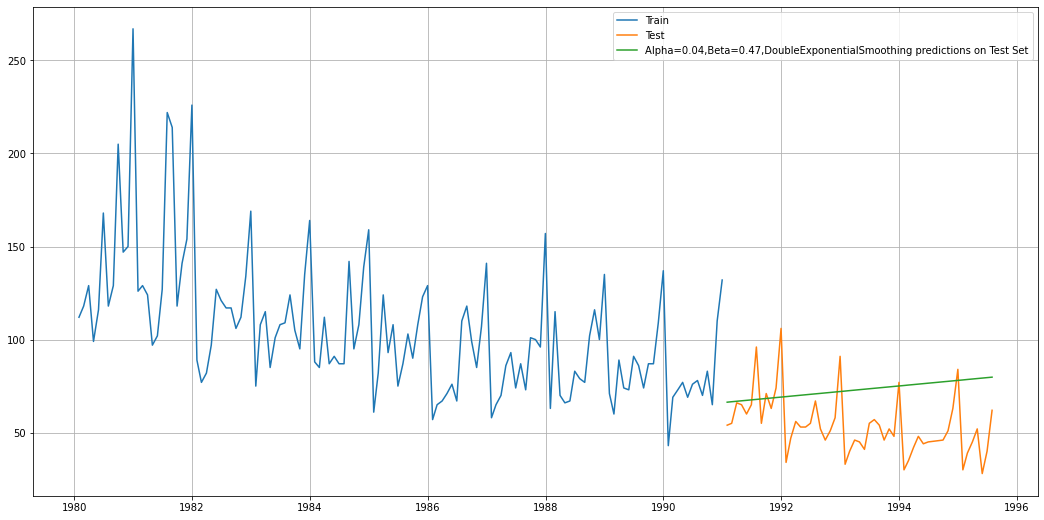

In [89]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict', 0.04, 0.5], label='Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

It is obvious that the time series follows linear trend.

#Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [90]:
##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality
#are accounted for in this model.
TES_train = train_rose.copy()
TES_test = test_rose.copy()

In [91]:
model_TES1 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',initialization_method='estimated')

In [92]:
model_TES2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [93]:
model_TES1_autofit = model_TES1.fit()
#The above fit of the model is by the best parameters that Python thinks for the model.
#It uses a brute force method to choose the parameters.

In [94]:
model_TES1_autofit.params

{'smoothing_level': 0.08898531157559146,
 'smoothing_trend': 0.0002591300826718728,
 'smoothing_seasonal': 0.004168430613498145,
 'damping_trend': nan,
 'initial_level': 146.57420709468784,
 'initial_trend': -0.5479248286892128,
 'initial_seasons': array([-31.21249276, -18.90696521, -10.93211674, -21.68643064,
        -12.82648513,  -7.12112425,   2.67037048,   8.9418594 ,
          4.95348593,   3.00846972,  21.0411481 ,  63.41729199]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES1_autofit.forecast(steps=len(test_rose))

In [96]:
## Test Data
rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.08,Beta=0.0002,Gamma=0.004, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.08,Beta=0.0002,Gamma=0.004, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.333


In [97]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.08,Beta=0.0002,Gamma=0.004,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


Least RMSE value is achieved using additive seasonality of Triple Exponential smoothing model, but it considers historical 
values for alpha, beta and gamma.

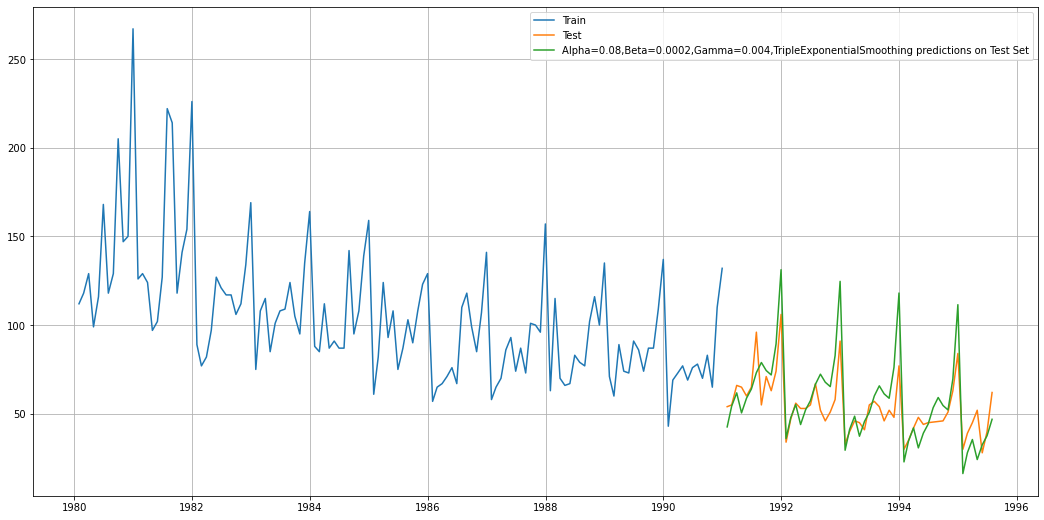

In [98]:
## Plotting on both the Training and Test using 
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.08,Beta=0.0002,Gamma=0.004,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

Let us also check with multiplicative seasonality.

In [99]:
model_TES2_autofit = model_TES2.fit()
#The above fit of the model is by the best parameters that Python thinks for the model.
#It uses a brute force method to choose the parameters.

In [100]:
model_TES2_autofit.params

{'smoothing_level': 0.07928872046776089,
 'smoothing_trend': 0.037834452420543105,
 'smoothing_seasonal': 0.0007984348951622034,
 'damping_trend': nan,
 'initial_level': 137.58959008033023,
 'initial_trend': -0.7861398351220041,
 'initial_seasons': array([0.81371589, 0.92214461, 1.00853188, 0.88142709, 0.99150706,
        1.07846475, 1.18667504, 1.26470849, 1.19359284, 1.17014635,
        1.36406824, 1.88023472]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [101]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES2_autofit.forecast(steps=len(test_rose))

In [102]:
## Test Data
rmse_model7_test_2 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.07,Beta=0.037,Gamma=0.0007, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_2))

For Alpha=0.07,Beta=0.037,Gamma=0.0007, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 18.778


In [103]:
resultsDf_7_2 = pd.DataFrame({'Test RMSE': [rmse_model7_test_2]}
                           ,index=['Alpha=0.07,Beta=0.037,Gamma=0.0007,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_2])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


comparatively high RMSE value is achieved using multiplicative seasonality of Triple Exponential smoothing model.

#Setting different alpha, beta and gamma values

In [104]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_model_TES1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model_TES1

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [105]:
for i in np.arange(0.3,1,0.1):
    for j in np.arange(0.3,1,0.1):
        for k in np.arange(0.3,1,0.1):
            model_TES_alpha_i_j_k = model_TES1.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_rose))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_model_TES1 = resultsDf_model_TES1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test}
                                                 , ignore_index=True)

In [106]:
resultsDf_model_TES1.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Train RMSE
1,0.3,0.3,0.4,12.723156,25.308660
0,0.3,0.3,0.3,12.950648,24.279693
49,0.4,0.3,0.3,13.293449,25.447354
99,0.5,0.3,0.4,17.883742,27.934042
154,0.6,0.4,0.3,23.408349,29.455453
...,...,...,...,...,...
237,0.7,0.8,0.9,31154.245976,441.229795
244,0.7,0.9,0.9,42265.921577,669.159257
335,0.9,0.8,0.9,62432.039480,2800.843210
341,0.9,0.9,0.8,68265.919595,2025.875258


In [107]:
TES_resultsDf_2= pd.DataFrame({'Test RMSE': [resultsDf_model_TES1.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4, Triple Exponential Smoothing'])
resultsDf = pd.concat([resultsDf, TES_resultsDf_2])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['predict',0.1100000000000002,0.01000000000002,0.46], label='Alpha=0.11,Beta=0.01,Gamma=0.46,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [112]:
print('Sorted by RMSE values on the Test Data:','\n',)
smoothing_df=resultsDf.sort_values(by=['Test RMSE'])
smoothing_df

Sorted by RMSE values on the Test Data: 



,Test RMSE
2pointTrailingMovingAverage,11.529278
"Alpha=0.3,Beta=0.3,Gamma=0.4, Triple Exponential Smoothing",12.723156
"Alpha=0.08,Beta=0.0002,Gamma=0.004,TripleExponentialSmoothing",14.332521
4pointTrailingMovingAverage,14.451403
"Alpha=0.04&Beta=0.47,DoubleExponentialSmoothing",14.560058
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Linear Regression,15.268955
"Alpha=0,Beta=0,Double ExponentialSmoothing",15.268966
"Alpha=0.07,Beta=0.037,Gamma=0.0007,TripleExponentialSmoothing",18.777596


## For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work 
better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a
model building exercise we had gone on to build different models on the data and have compared these model with the 
best RMSE value(least accuracy) on the test data.

We see that the best model is the 2pointTrailingMovingAverage and Triple Exponential Smoothing with additive seasonality with the parameters
$\alpha$ = 0.3, $\beta$ = 0.3and $\gamma$ = 0.4

5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and
also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps
to make it stationary. Check the new data for stationarity and comment.

To check whether the data is stationary or not, we will perform a test called the Dickey-Fuller test. 
the Dickey-Fuller test (ADF) is used to test the null hypothesis, i.e. to check if a unit root is present 
in a sample of a time-series data. 

We end up deciding this based on the return of the p-value.

A small p-value which is considered below 0.05 indicates strong evidence against the null hypothesis,
thereby we reject the null hypothesis.

A large p-value which is considered above 0.05 indicates weak or no evidence against the null hypothesis, 
thereby we fail to reject the null hypothesis.

In [108]:
from statsmodels.tsa.stattools import adfuller

In [109]:
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("fail to reject H0 and data is non-stationary ")

In [110]:
check_adf(rosedf['Rose'])

ADF Test:
ADF Statistic: -1.8766991079908266
p-value: 0.3431007142833742
No. of Lags Used: 13
Number of Observations Used: 173
fail to reject H0 and data is non-stationary 


We see that the series is not stationary at  𝛼  = 0.05.

In [111]:
check_adf((rosedf['Rose']).diff().dropna())

ADF Test:
ADF Statistic: -8.044392160323337
p-value: 1.810894683080779e-12
No. of Lags Used: 12
Number of Observations Used: 173
Reject null hypothesis and data is stationary


We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected 
using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Initially, we build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

 Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes 
we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.


In [112]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [113]:
# Creating an empty Dataframe with column names only
ARIMA_AIC =pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [114]:
from statsmodels.tsa.arima_model import ARIMA

In [115]:
for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464336
ARIMA(0, 1, 2) - AIC:1276.8353731090106
ARIMA(1, 1, 0) - AIC:1319.3483105801806
ARIMA(1, 1, 1) - AIC:1277.7757528008215
ARIMA(1, 1, 2) - AIC:1277.3592236322227
ARIMA(2, 1, 0) - AIC:1300.609261174594
ARIMA(2, 1, 1) - AIC:1279.0456894093172
ARIMA(2, 1, 2) - AIC:1279.2986939365428


In [116]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775753
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [117]:
auto_ARIMA = ARIMA(train_rose['Rose'], order=(0,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Wed, 09 Dec 2020   AIC                           1276.835
Time:                        18:23:46   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [118]:
## Predict on the Test Set using this model and evaluate the model.
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rose))

In [119]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.618146805002446


In [120]:
resultsDf_arima= pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])
resultsDf = pd.concat([resultsDf,resultsDf_arima])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


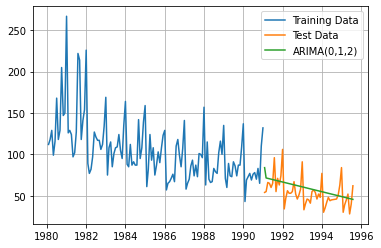

In [121]:
plt.plot(train_rose,label='Training Data')
plt.plot(test_rose,label='Test Data')
plt.plot(test_rose.index,predicted_auto_ARIMA[0],label='ARIMA(0,1,2)')
plt.legend(loc='best')
plt.grid();

Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

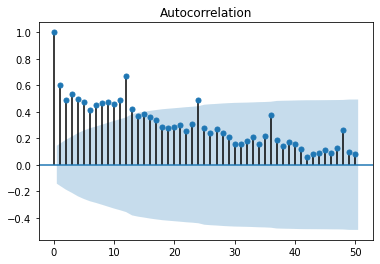

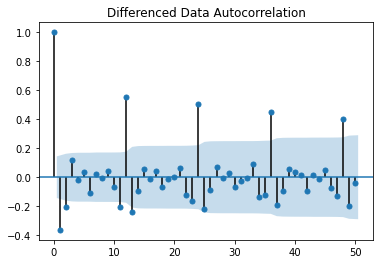

In [123]:
plot_acf(rosedf['Rose'],lags=50)
plot_acf(rosedf['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [124]:
## Seasonality after certain lags is visible. Every 12th 

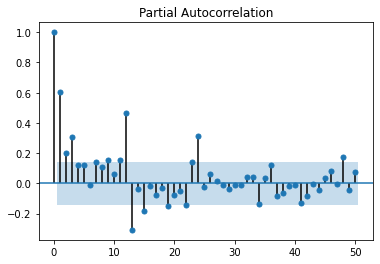

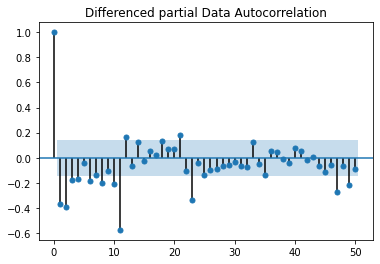

In [125]:
plot_pacf(rosedf['Rose'],lags=50)
plot_pacf(rosedf['Rose'].diff().dropna(),lags=50,title='Differenced partial Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12.
We will run our auto SARIMA models by setting seasonality as 12.

In [126]:
### Setting the seasonality as 12 for the auto SARIMA model.
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [127]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [128]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207373
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380896
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786968923
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913640046321
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794541633698
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735409343574
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097263765
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591702
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049709445
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324695218
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434331286504
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573482601379
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866186082
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430440256
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988255714232
SARIMA(0, 1, 2)x(0, 0, 

In [129]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668847
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346498
70,"(2, 1, 1)","(2, 0, 1, 12)",897.639957


In [131]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Wed, 09 Dec 2020   AIC                            887.938
Time:                                    18:27:56   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8428    174.490     -0.005      0.996    -342.836     341.151
ma.L2         -0.1572     27.463   

In [199]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

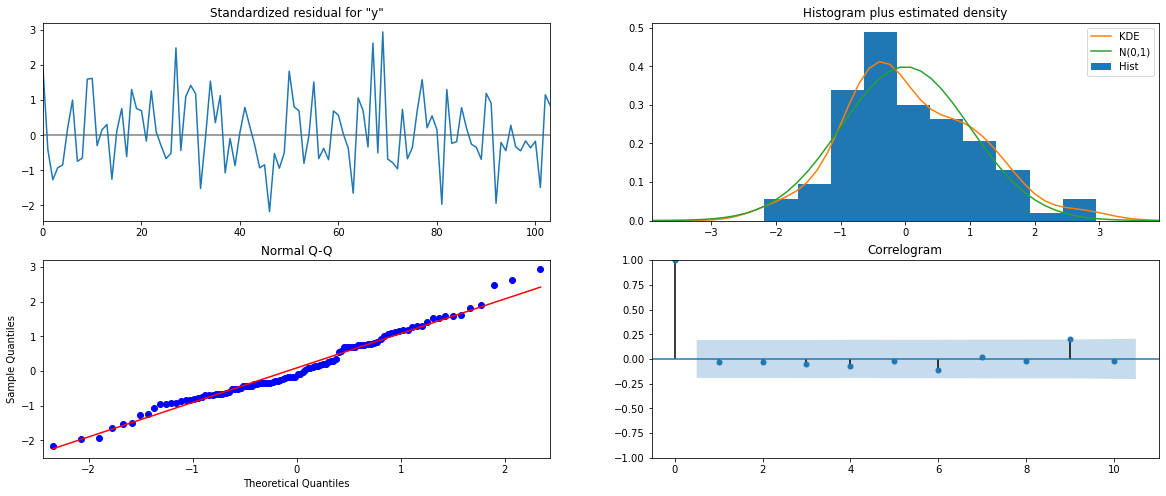

In [200]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Inferences:
Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots do not fall perfectly in line with the red line would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated.

In [ ]:
From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and 
thus we cannot develop any pattern from these plots. 

In [133]:
## Predict on the Test Set using this model and evaluate the model.
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_rose))

In [134]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867710,15.928466,31.648491,94.086928
1,70.541191,16.147539,38.892596,102.189786
2,77.357273,16.147537,45.708683,109.005863
3,76.209639,16.147537,44.561049,107.858229
4,72.748087,16.147537,41.099497,104.396678


In [135]:
rmse_sarima_12 = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse_sarima_12)

26.9293679973534


In [136]:
sarima_resultsDf = pd.DataFrame({'Test RMSE': [rmse_sarima_12]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf,sarima_resultsDf])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


We see that we have huge gain the RMSE value by including the seasonal parameters as well.

7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the 
training data and evaluate this model on the test data using RMSE.

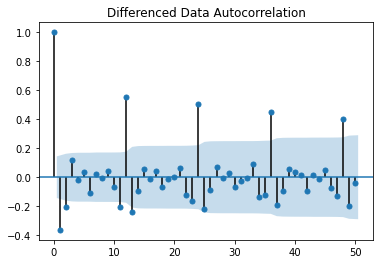

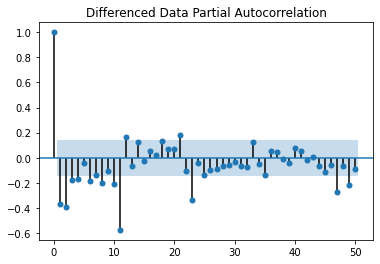

In [137]:
## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.
#Let us look at the ACF and the PACF plots once more.
plot_acf(rosedf['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rosedf['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 1.

In [138]:
manual_ARIMA = ARIMA(train_rose['Rose'], order=(1,1,1),freq='M')

In [139]:
results_manual_ARIMA = manual_ARIMA.fit()

In [140]:
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.888
Method:                       css-mle   S.D. of innovations             30.280
Date:                Wed, 09 Dec 2020   AIC                           1277.776
Time:                        18:28:45   BIC                           1289.277
Sample:                    02-29-1980   HQIC                          1282.449
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4870      0.086     -5.656      0.000      -0.656      -0.318
ar.L1.D.Rose     0.2006      0.087      2.293      0.022       0.029       0.372
ma.L1.D.Rose    -0.9999      0.035    -28.64

We get a comparatively simpler model by looking at the ACF and the PACF plots.

In [141]:
## Predict on the Test Set using this model and evaluate the model.
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_rose))

In [142]:
rmse_manual_arima = mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse_manual_arima)

15.73449403635471


In [143]:
manualarima_resultsDf = pd.DataFrame({'Test RMSE': [rmse_manual_arima]}
                           ,index=['Manual_ARIMA(1,1,1)'])
resultsDf = pd.concat([resultsDf,manualarima_resultsDf])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


We see that the difference in RMSE values is moderately high with a much simpler model built.

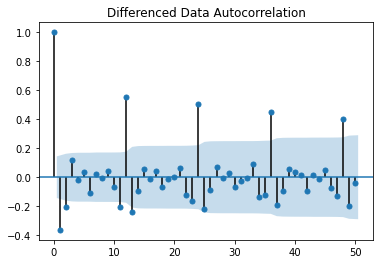

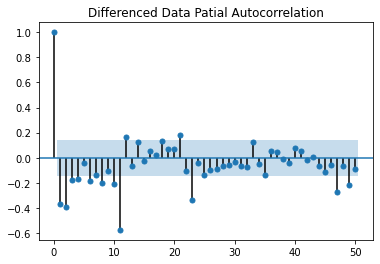

In [144]:
## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.
#Let us look at the ACF and the PACF plots once more.
plot_acf(rosedf['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rosedf['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [145]:
import statsmodels.api as sm
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(1, 1, 1),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -443.336
Date:                                 Wed, 09 Dec 2020   AIC                            900.673
Time:                                         18:28:56   BIC                            919.250
Sample:                                              0   HQIC                           908.201
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1594      0.118      1.352      0.177      -0.072       0

In [201]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

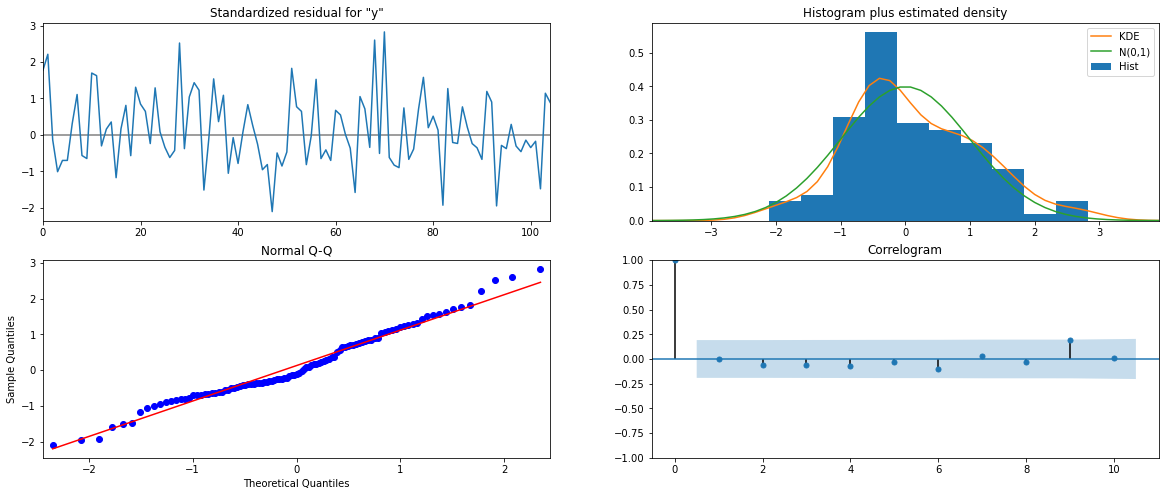

In [202]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [147]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_rose))

In [148]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,63.988790,16.259536,32.120685,95.856895
1,70.455839,16.488464,38.139044,102.772634
2,77.934989,16.498019,45.599467,110.270512
3,76.451551,16.498864,44.114371,108.788730
4,72.981627,16.498982,40.644217,105.319037


In [149]:
rmse = mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

27.180508437681578


In [150]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ManualSARIMA(1,1,1)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


#setting different seasonal orders 

In [168]:
import statsmodels.api as sm
manual_SARIMA_7 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_7 = manual_SARIMA_7.fit(maxiter=1000)
print(results_manual_SARIMA_7.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -453.023
Date:                            Wed, 09 Dec 2020   AIC                            914.045
Time:                                    18:33:25   BIC                            924.661
Sample:                                         0   HQIC                           918.347
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1832      0.103      1.777      0.076      -0.019       0.385
ma.L1         -0.9260      0.050   

In [169]:
predicted_manual_SARIMA_7 = results_manual_SARIMA_7.get_forecast(steps=len(test_rose))

In [170]:
predicted_manual_SARIMA_7.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,46.711411,17.920934,11.587026,81.835796
1,63.994185,18.504230,27.726561,100.261808
2,68.577093,18.631086,32.060836,105.093351
3,65.896173,18.710629,29.224014,102.568333
4,64.109672,18.782500,27.296649,100.922695


In [171]:
rmse = mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_7.predicted_mean,squared=False)
print(rmse)

16.685009381406193


In [172]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ManualSARIMA(1,1,1)(0,1,1,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


In [174]:
import statsmodels.api as sm
manual_SARIMA_8 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_8 = manual_SARIMA_8.fit(maxiter=1000)
print(results_manual_SARIMA_8.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -522.359
Date:                            Wed, 09 Dec 2020   AIC                           1054.718
Time:                                    18:42:34   BIC                           1068.529
Sample:                                         0   HQIC                          1060.325
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1364      0.073      1.863      0.063      -0.007       0.280
ma.L1         -0.9636      0.071   

In [175]:
predicted_manual_SARIMA_8 = results_manual_SARIMA_8.get_forecast(steps=len(test_rose))

In [176]:
predicted_manual_SARIMA_8.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,67.886608,19.786342,29.106091,106.667125
1,71.215832,20.078724,31.862255,110.569409
2,73.609410,20.115487,34.183780,113.035040
3,69.657934,20.135052,30.193957,109.121911
4,72.083902,20.152585,32.585561,111.582243


In [177]:
rmse = mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_8.predicted_mean,squared=False)
print(rmse)

21.70294377279746


In [178]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ManualSARIMA(1,1,1)(0,1,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


8.Build a table (create a data frame) with all the models built along
with their corresponding parameters and the respective RMSE values on the test data.

In [179]:
resultsDf

,Test RMSE
Linear Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.53,SimpleExponentialSmoothing",61.301141


In [180]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
2pointTrailingMovingAverage,11.529278
"Alpha=0.3,Beta=0.3,Gamma=0.4, Triple Exponential Smoothing",12.723156
"Alpha=0.08,Beta=0.0002,Gamma=0.004,TripleExponentialSmoothing",14.332521
4pointTrailingMovingAverage,14.451403
"Alpha=0.04&Beta=0.47,DoubleExponentialSmoothing",14.560058
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Linear Regression,15.268955
"Alpha=0,Beta=0,Double ExponentialSmoothing",15.268966
"ARIMA(0,1,2)",15.618147


9.Based on the model-building exercise, build the most optimum model(s) on the complete 
data and predict 12 months into the future with appropriate confidence intervals/bands.

In [203]:
fullmodel1 = ExponentialSmoothing(rosedf,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.4)

In [204]:
RMSE_fullmodel1 = metrics.mean_squared_error(rosedf['Rose'],fullmodel1.fittedvalues,squared=False)

In [205]:
print('RMSE:',RMSE_fullmodel1)

RMSE: 21.680604594633362


In [206]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

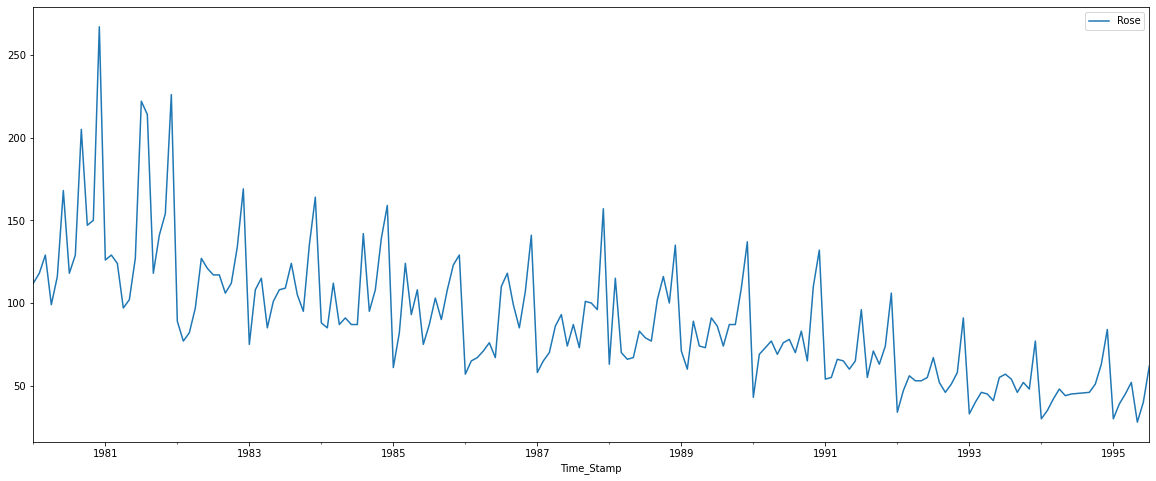

In [207]:
rosedf.plot()

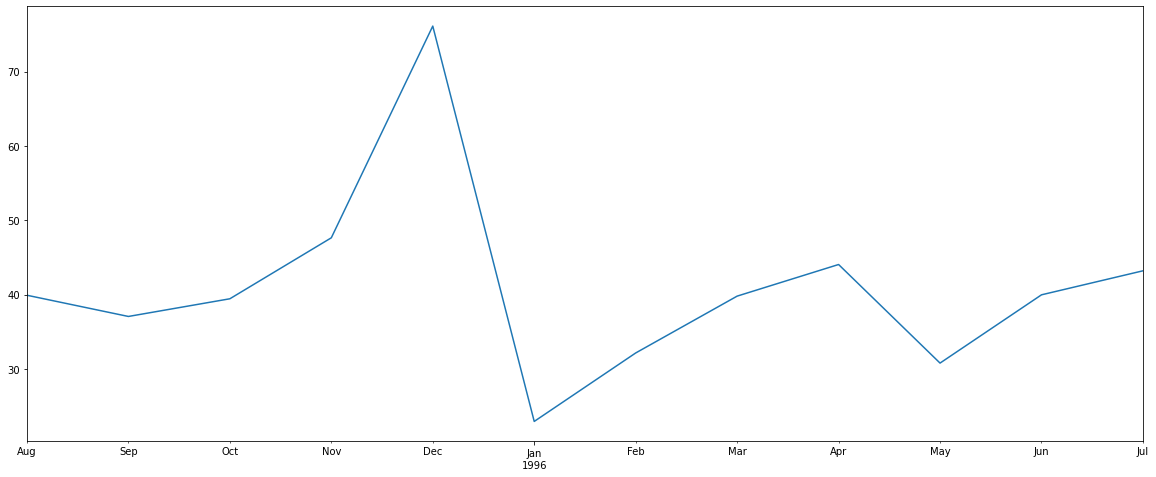

In [208]:
prediction_1.plot();

In [209]:
#One assumption that we have made over here while calculating the confidence bands is 
#that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,-2.693344,39.913881,82.521106
1995-09-30,-5.546415,37.060810,79.668035
1995-10-31,-3.168018,39.439207,82.046432
1995-11-30,5.034254,47.641479,90.248704
1995-12-31,33.512943,76.120168,118.727393


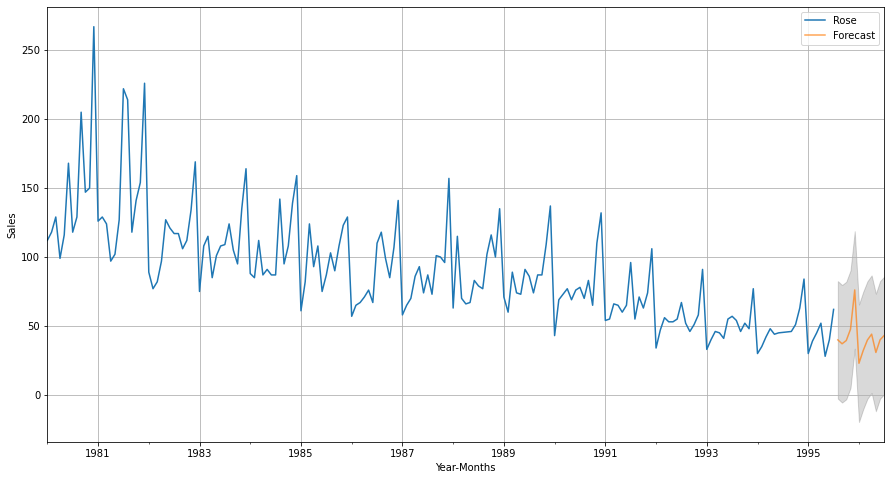

In [211]:
# plot the forecast along with the confidence band

axis = rosedf.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()